# Project Description

In this project I will examine the [Boston Airbnb Dataset](https://www.kaggle.com/airbnb/boston), which contains information about airbnb listings, such as guest review, room information, price etc.

I will be using the Cross-Industry Standard Process for Data Mining (CRISP-DM) process, which contains following steps:


1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

### 1.Business Understanding

AirBnb is the largest home-sharing platform, which allows home-owners to rent part or their property or the entire property to guests for a period of time. The aim of this project is to use the Boston Airbnb Dataset to get an answer to the below questions: 

#### Q1: What are the key factors which  influence the price of a listing?

#### Q2: How is customer rating related to the price?

#### Q3: What are the 5 most expensive zipcodes in boston? And where are the cheapest place to stay in boston?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pprint
import re
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option("display.max_columns", 100)

### 2.Data Understanding

In this section we want to get a brief understanding of the provided dataset. We focus on the listing dataset since it contains the most information.

In [2]:
df_listing = pd.read_csv('data/seattle/listings.csv')
print(f'Dimension of Listing Dataframe: {df_listing.shape}')

Dimension of Listing Dataframe: (3818, 92)


In [3]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
# view the columns with non-numerical columns
print('Non-Numerical columns:')
print(df_listing.select_dtypes(include='object').columns)
df_listing.select_dtypes(include='object').head()

Non-Numerical columns:
Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',


,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,NaN,NaN,$5.00,4 weeks ago,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00,today,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Qu

observations:
- experiences_offered: in this column there is value none --> should be NaN to make it consistent with other columns
- host_response_rate and host_acceptance_rate: those are actullay numeric values --> should be converted to type float64
- price, cleaning_fee, extra_people,...: those currency values contains currency symbols --> should be conterted to type float 64
- 'host_response_time', 'host_is_superhost', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_has_profile_pic', 'host_identity_verified':
those are columns should be categorized

### 3.Data Preparation

This section is mainly for dropping and imputing the attributes in the dataset, so that the dataset we're dealing with contains only useful information that will help us with the analysis.

In [5]:
# percentage of missing values
df_listing.isnull().mean().sort_values(ascending=False).head(20)

license                        1.000000
square_feet                    0.974594
monthly_price                  0.602672
security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
host_acceptance_rate           0.202462
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
reviews_per_month              0.164222
first_review                   0.164222
dtype: float64

In [6]:
def convert_special_symbol(df, col, symbol='$,%'):
    '''
    this function converts the object types in dataframe to float type by removing special symbols
    
    INPUT:
    df - Dataframe to be converted
    col - columns to be converted
    symbol - symbols to be removed, default '$,%'
    
    '''
    if col in df.columns and df[col].dtype !='float64':
        print(f'Convert column {col} into data type float64')
        symbol = re.compile('[{}]'.format(symbol))
        df[col] = df[col].apply(lambda x: symbol.sub('', x) if pd.notna(x) else x)
        # convert data type to float64
        df[col] = df[col].astype('float64')

In [7]:
def clean_data(df):
    
    # experiences_offered: replace none to NaN
    if 'experiences_offered' in df.columns:
        print('Replacing none with NaN for column experience offered\n')
        df['experiences_offered'] = df['experiences_offered'].replace('none', np.nan)
    # drop the columns with missing value proportion greater than 30%
    
    drop_columns = list(df.columns[df.isnull().mean() > 0.3])
    print('Dropping columns with more than 30% missing values, including:\n')
    pprint.pprint(drop_columns)
    df = df.dropna(thresh=df.shape[0] * 0.7, axis=1)
    
    # deal with special symbols
    target_columns = ['price', 'monthly_price', 'weekly_price', 'security_deposit',
                      'cleaning_fee', 'extra_people', 'host_response_rate', 'host_acceptance_rate']
    for col in target_columns:
        if col in df.columns:
            convert_special_symbol(df, col)
    
    # fill missing values with mean value of the column
    fill_mean = lambda col: col.fillna(col.mean())
    num_col = list(df.dtypes[df.dtypes != 'object'].index)
    print('\nFill missing values with mean value of the column, including:\n')
    pprint.pprint(num_col)
    df[num_col] = df[num_col].apply(fill_mean) 
    
    # deal with categorized data
    target_columns = ['host_response_time', 'host_is_superhost', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_has_profile_pic', 'host_identity_verified',
                 'neighbourhood_cleansed']
    
    for col in target_columns:
        if col in df.columns: 
            print(f'Create dummy variables for categorized feature: {col}')
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)
        else:
            print(col, ' not in df')
            
        
    # drop object columns
    drop_cols = list(df.select_dtypes(include='object').columns)
    sf = df.select_dtypes(exclude='object')
    print('\nDropping remaining object columns: \n')
    pprint.pprint(drop_cols)
    
    df = df.select_dtypes(exclude='object')
    
    # drop id columns, lat lon columns, url columns and other columns with irrelevant informations such as name etc
    drop_cols = ['id', 'scrape_id', 'host_id', 'latitude', 'longitude']
    print('\nDropping features unique to listing, including:')
    pprint.pprint(drop_cols)
    
    
    df = df.drop(columns = drop_cols)
    return df

In [8]:
df_cleaned = clean_data(df_listing)

Replacing none with NaN for column experience offered

Dropping columns with more than 30% missing values, including:

['experiences_offered',
 'notes',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'license']
Convert column price into data type float64
Convert column cleaning_fee into data type float64
Convert column extra_people into data type float64
Convert column host_response_rate into data type float64
Convert column host_acceptance_rate into data type float64

Fill missing values with mean value of the column, including:

['id',
 'scrape_id',
 'host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_r

/lhome/severia/anaconda3/envs/bostn_airbnb/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/lhome/severia/anaconda3/envs/bostn_airbnb/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/lhome/severia/anaconda3/envs/bostn_airbnb/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Create dummy variables for categorized feature: require_guest_profile_picture
Create dummy variables for categorized feature: require_guest_phone_verification
Create dummy variables for categorized feature: host_has_profile_pic
Create dummy variables for categorized feature: host_identity_verified
Create dummy variables for categorized feature: neighbourhood_cleansed

Dropping remaining object columns: 

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'street',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'amenities',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first

In [9]:
print('Features used for Training:')
pprint.pprint(list(df_cleaned.columns))

Features used for Training:
['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_response_time_within an hour',
 'host_is_superhost_t',
 'is_location_exact_t',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'propert

In [10]:
df_cleaned.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,is_location_exact_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,...,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace
0,96.000000,100.000000,3.0,3.0,4,1.0,1.0,1.0,85.0,61.710904,2,5.0,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,4.070000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,98.000000,100.000000,6.0,6.0,4,1.0,1.0,1.0,150.0,40.000000,1,0.0,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,1.480000,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,67.000000,100.000000,2.0,2.0,11,4.5,5.0,7.0,975.0,300.000000,10,25.0,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,1.150000,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,94.886798,99.967159,1.0,1.0,3,1.0,0.0,2.0,100.0,61.710904,1,0.0,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,

### 4.Data Modeling

In this section, we will make use of various data analysis techniques to answer the 3 questions in interest.

#### Q1: How is customer rating related to the price?

In [15]:
filter_col = [col for col in df_cleaned if col.startswith('review_scores')]

In [16]:
filter_col = [col for col in df_cleaned if col.startswith('review_scores')]
# remove reviews_per_month and review_scores_rating
df1 = df_cleaned[filter_col + ['price']].drop(columns = ['review_scores_rating'])

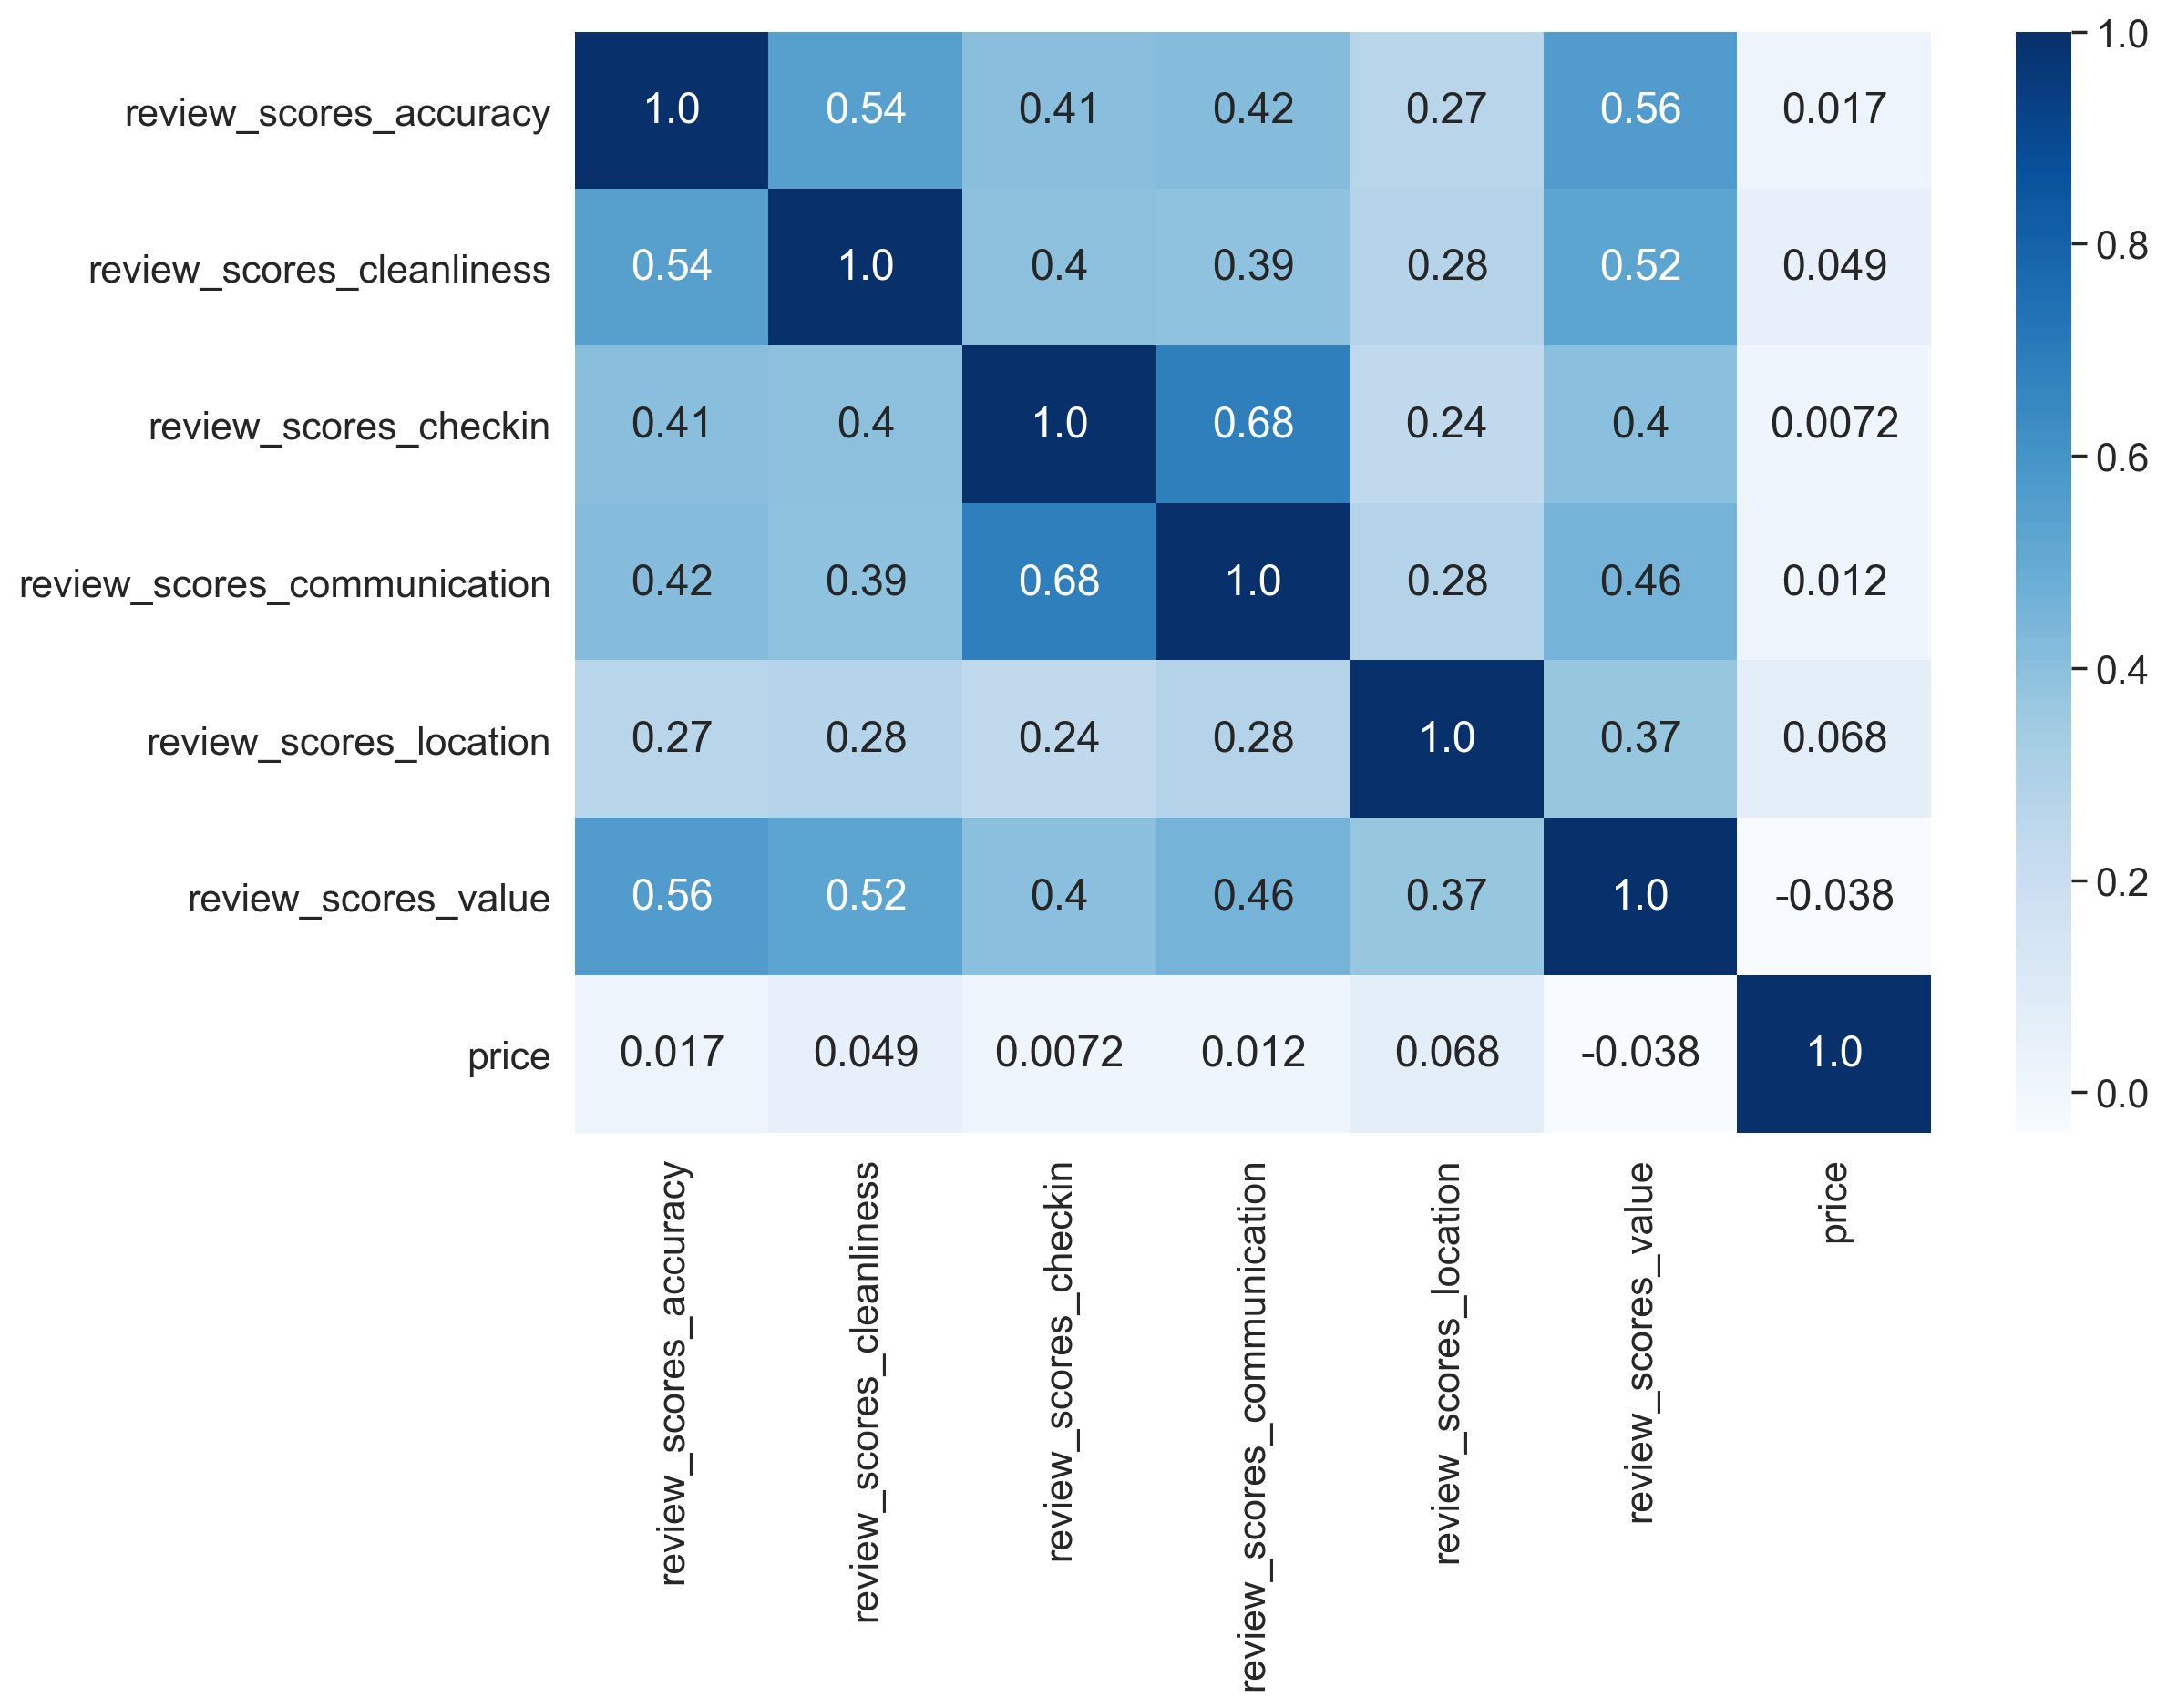

In [23]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')
fig = plt.figure(figsize=(12,8), dpi=100)
sns.set(font_scale=1.4)
ax = sns.heatmap(corr,annot=True,cmap='Blues', fmt=".2");
ax.set_ylim(7, 0);

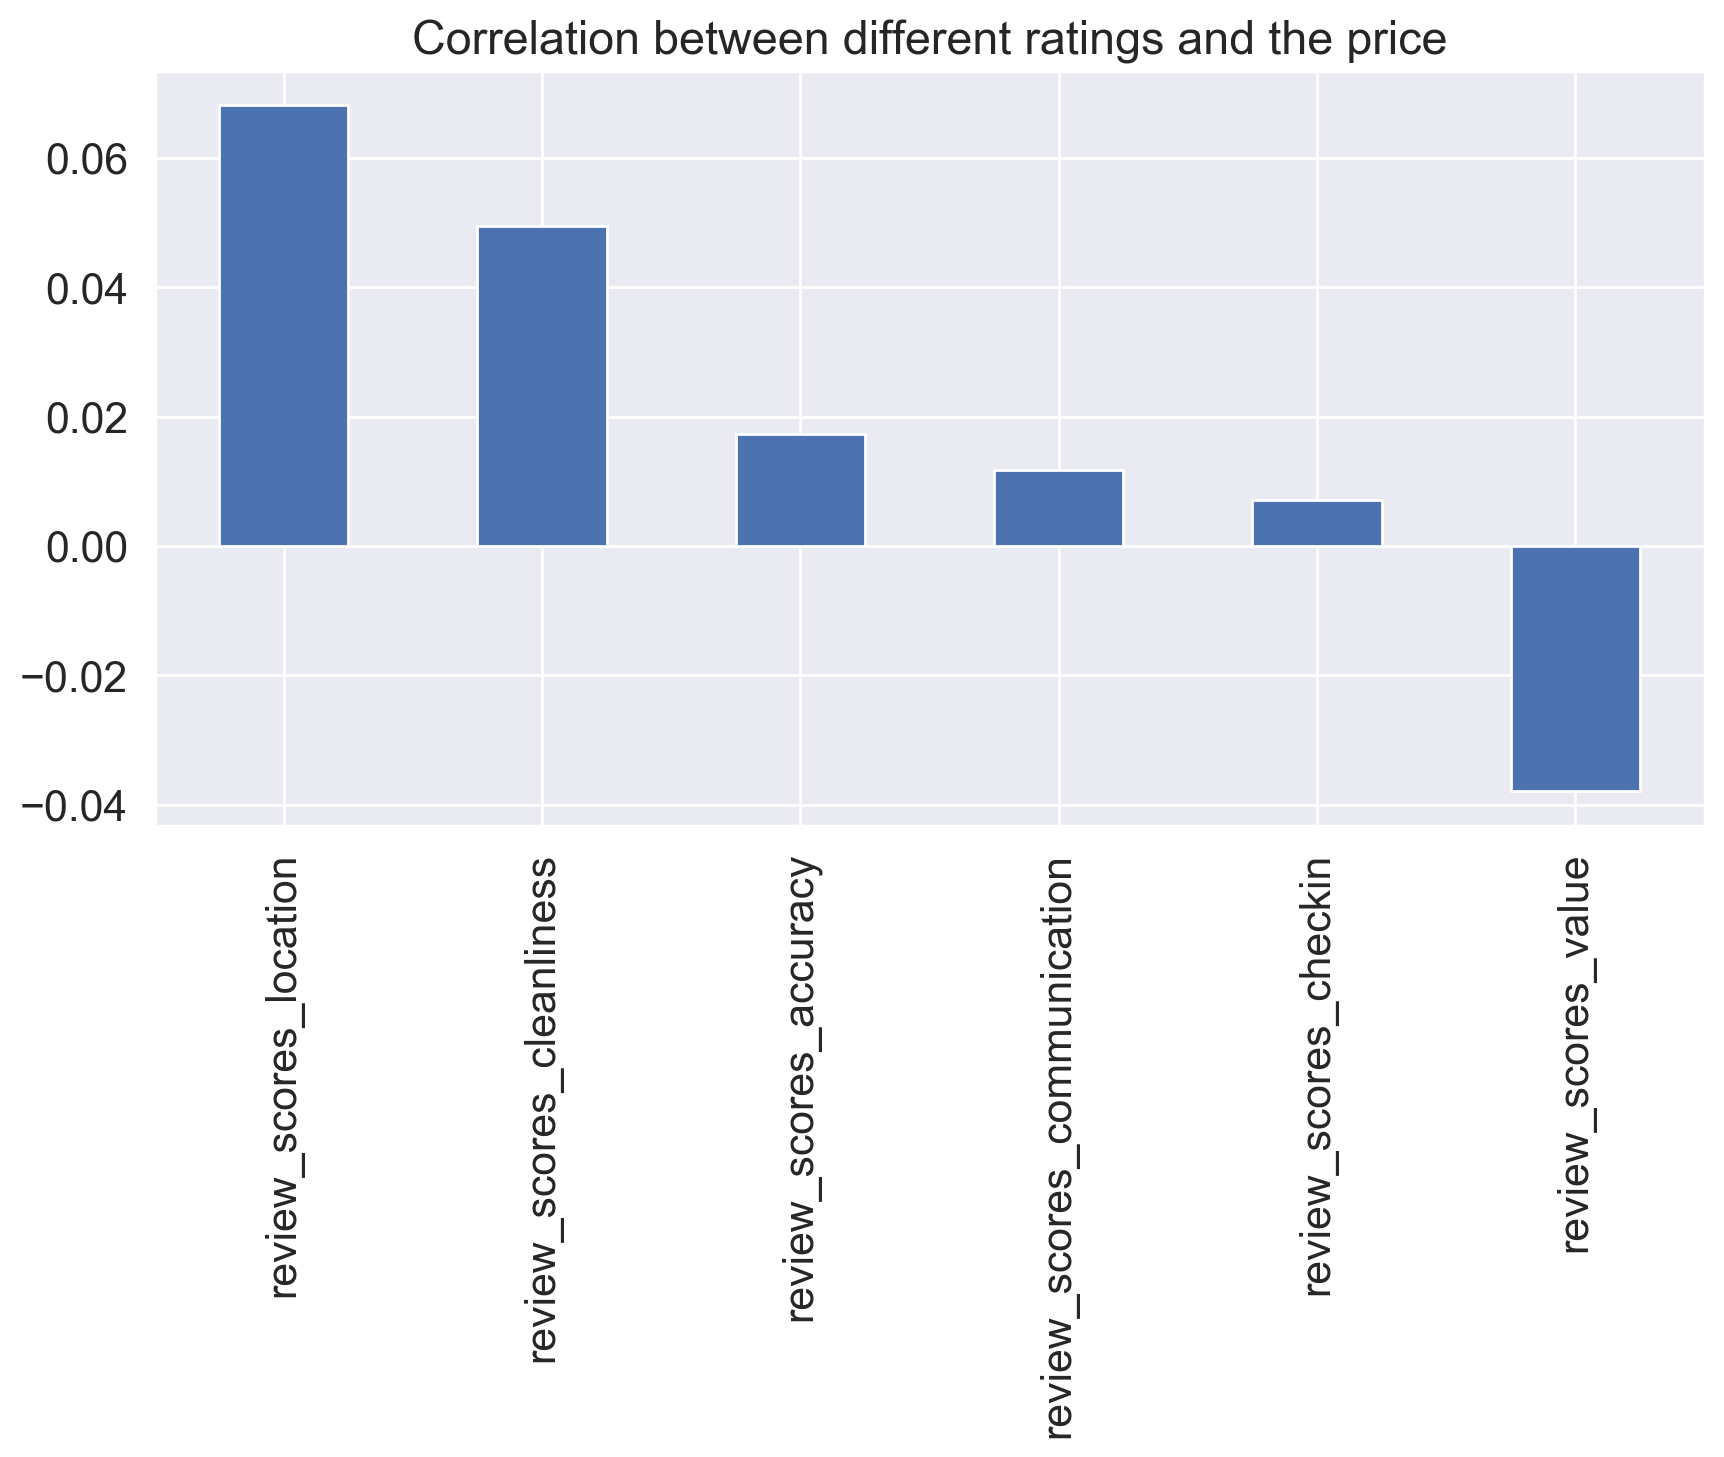

In [24]:
fig = plt.figure(figsize=(10,5), dpi=100)
corr['price'].drop('price').sort_values(ascending=False).plot(kind='bar', grid= 20,
                                                             title= 'Correlation between different ratings and the price');


#### Evaluation:

As can be seen in the graph above, the review score on the location has the largest impact on the price, following by the reviews on cleanliness. We can draw the conclusion that many of the airbnb guests would likely to pay more for a place with good location and clean rooms. On the other hand, review score on checkin process and communication between guest and the host are less reflected in the price. 

#### Q2: What are the key factors which  influence the price of a listing?

In [15]:
# Random Forest

def fit_random_forest(x, y,model=None):
    '''
    This is a function which trains the random forest model
    
    INPUT:
    x - pandas dataframe, x matrix
    y - pandas dataframe, response variable
    
    OUTPUT:
    forest - trained model object from sklearn
    '''
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=1)
    if model is None:
        forest = RandomForestRegressor(n_estimators=500, 
                                       criterion='mse', 
                                       random_state=3, 
                                       #min_samples_leaf=2,
                                       #min_samples_split=2,
                                       n_jobs=-1)
        forest.fit(X_train, y_train)
    
    else:
        forest = model
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)

    fig = plt.figure(figsize=(10,5), dpi=200)
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
                c='lightgreen', marker='s', label='Test data')
    
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.grid()
    print('MSE train: %.3f, test: %.3f' % (
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))
    print('R2 score train: %.3f, test: %.3f' % (
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))
    return forest

MSE train: 409.165, test: 3477.804
R2 score train: 0.951, test: 0.553


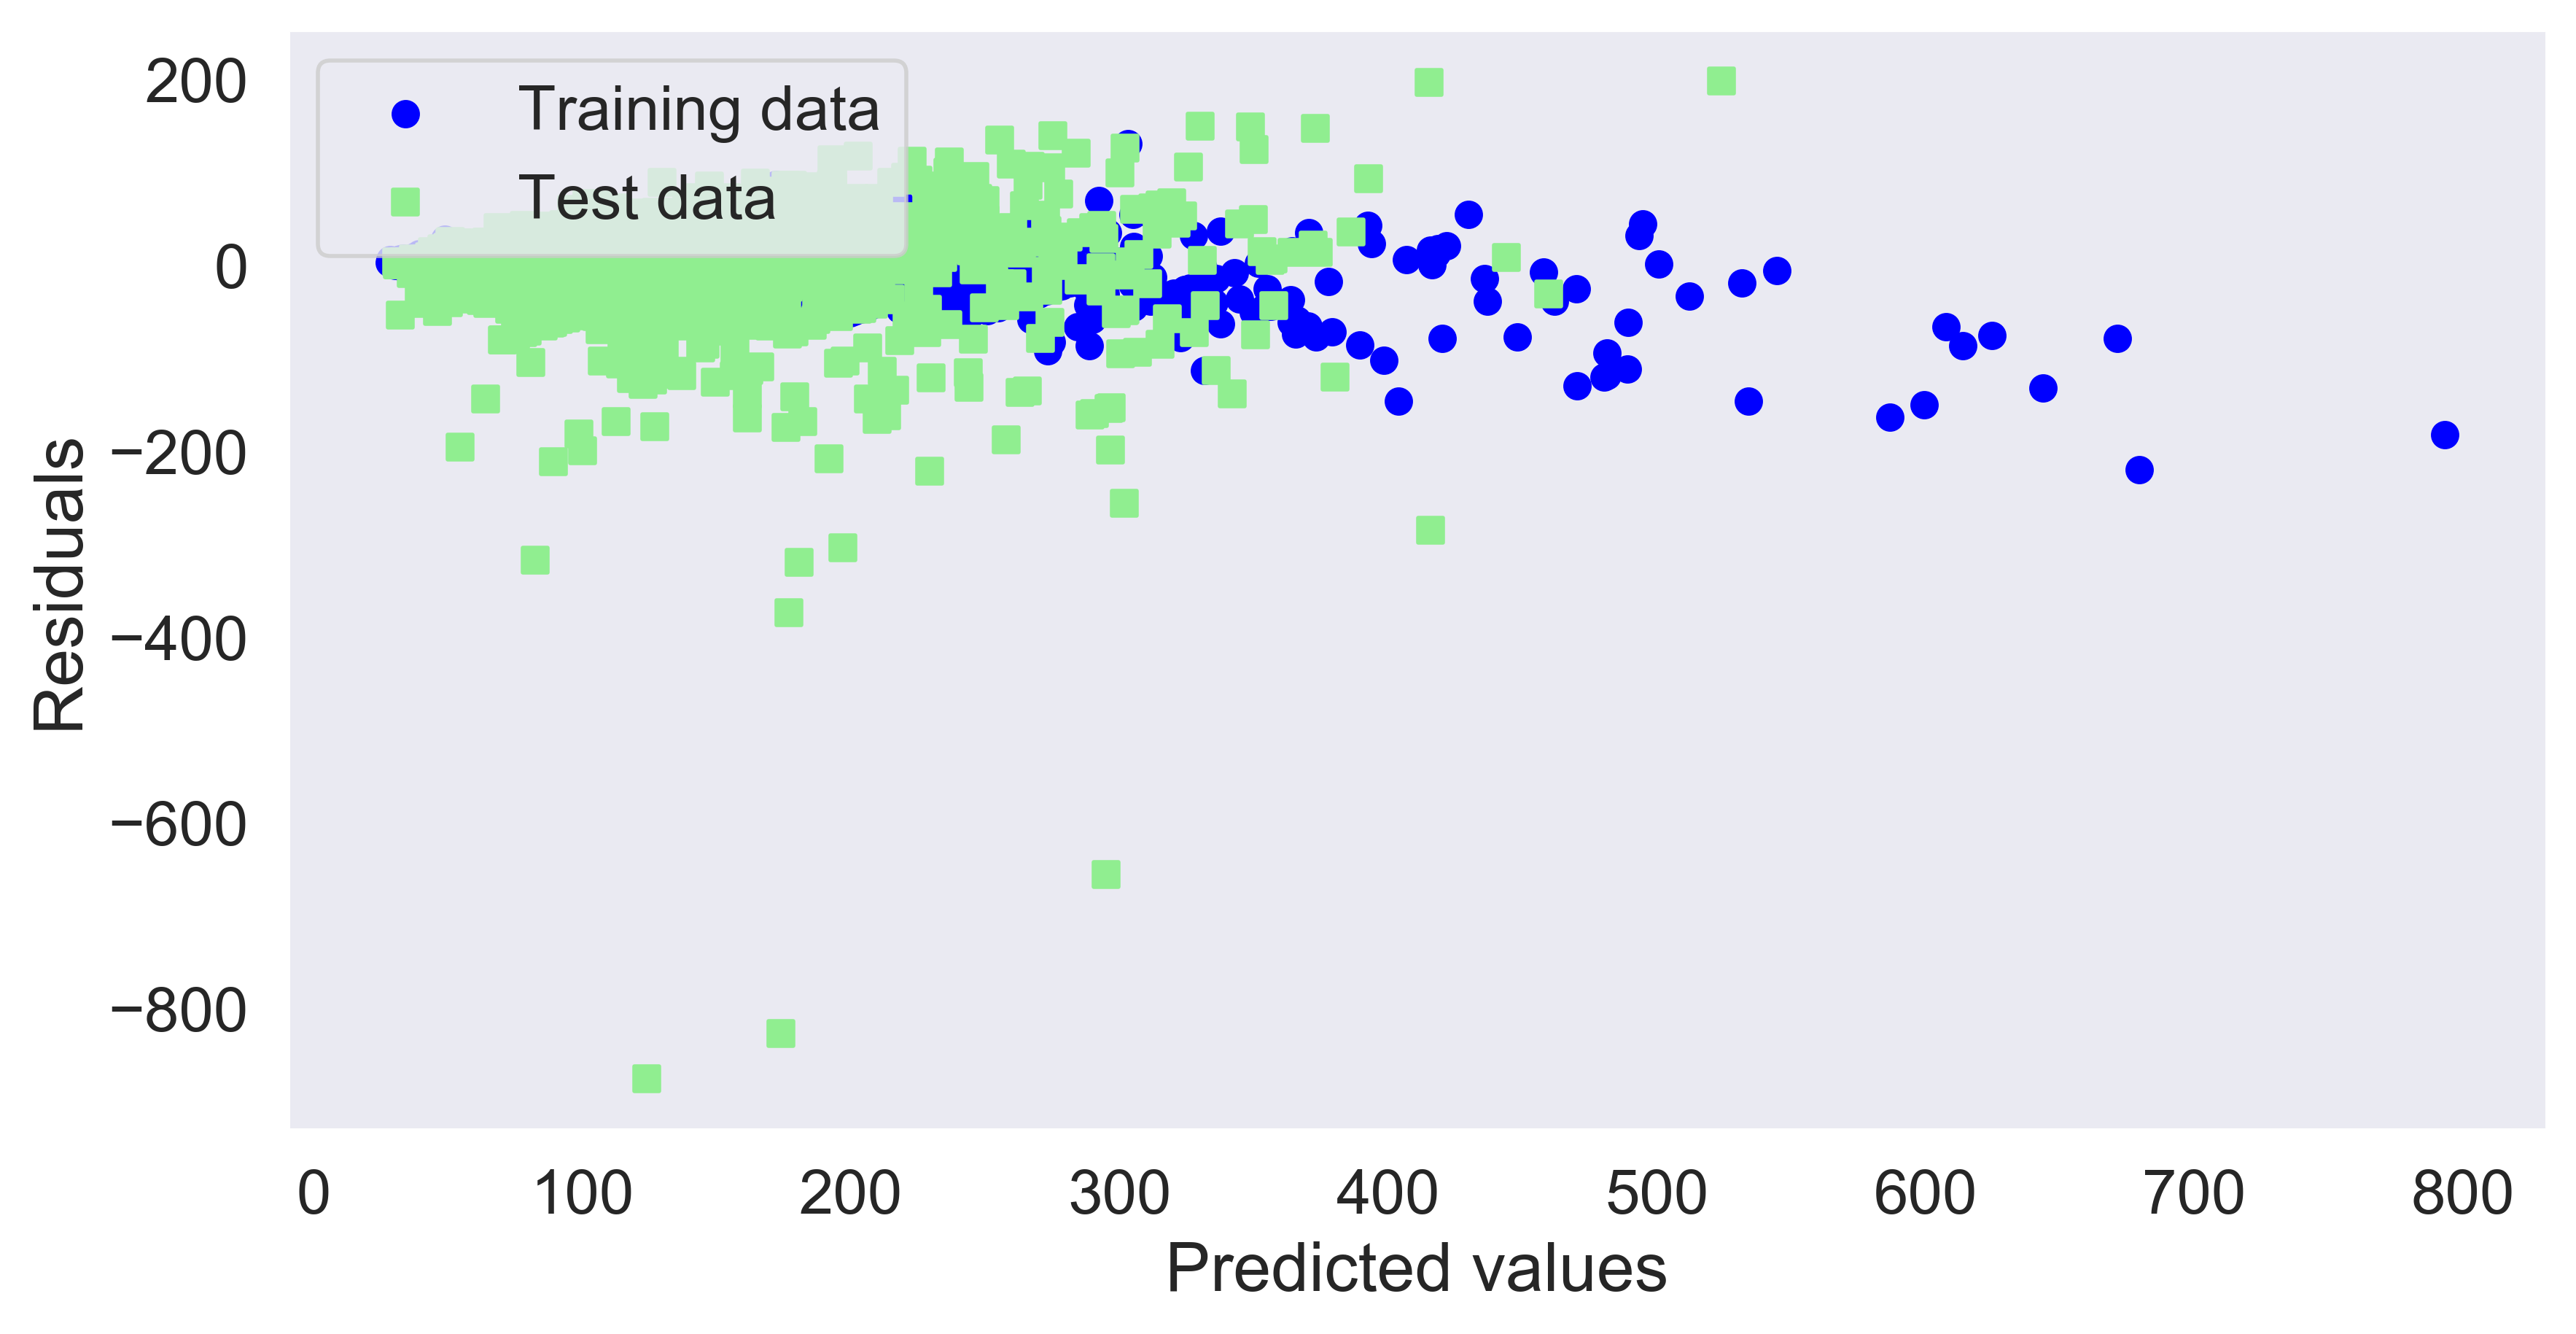

In [16]:
x_price = df_cleaned.drop('price', axis=1)
y_price = df_cleaned['price']
f_price = fit_random_forest(x_price, y_price)

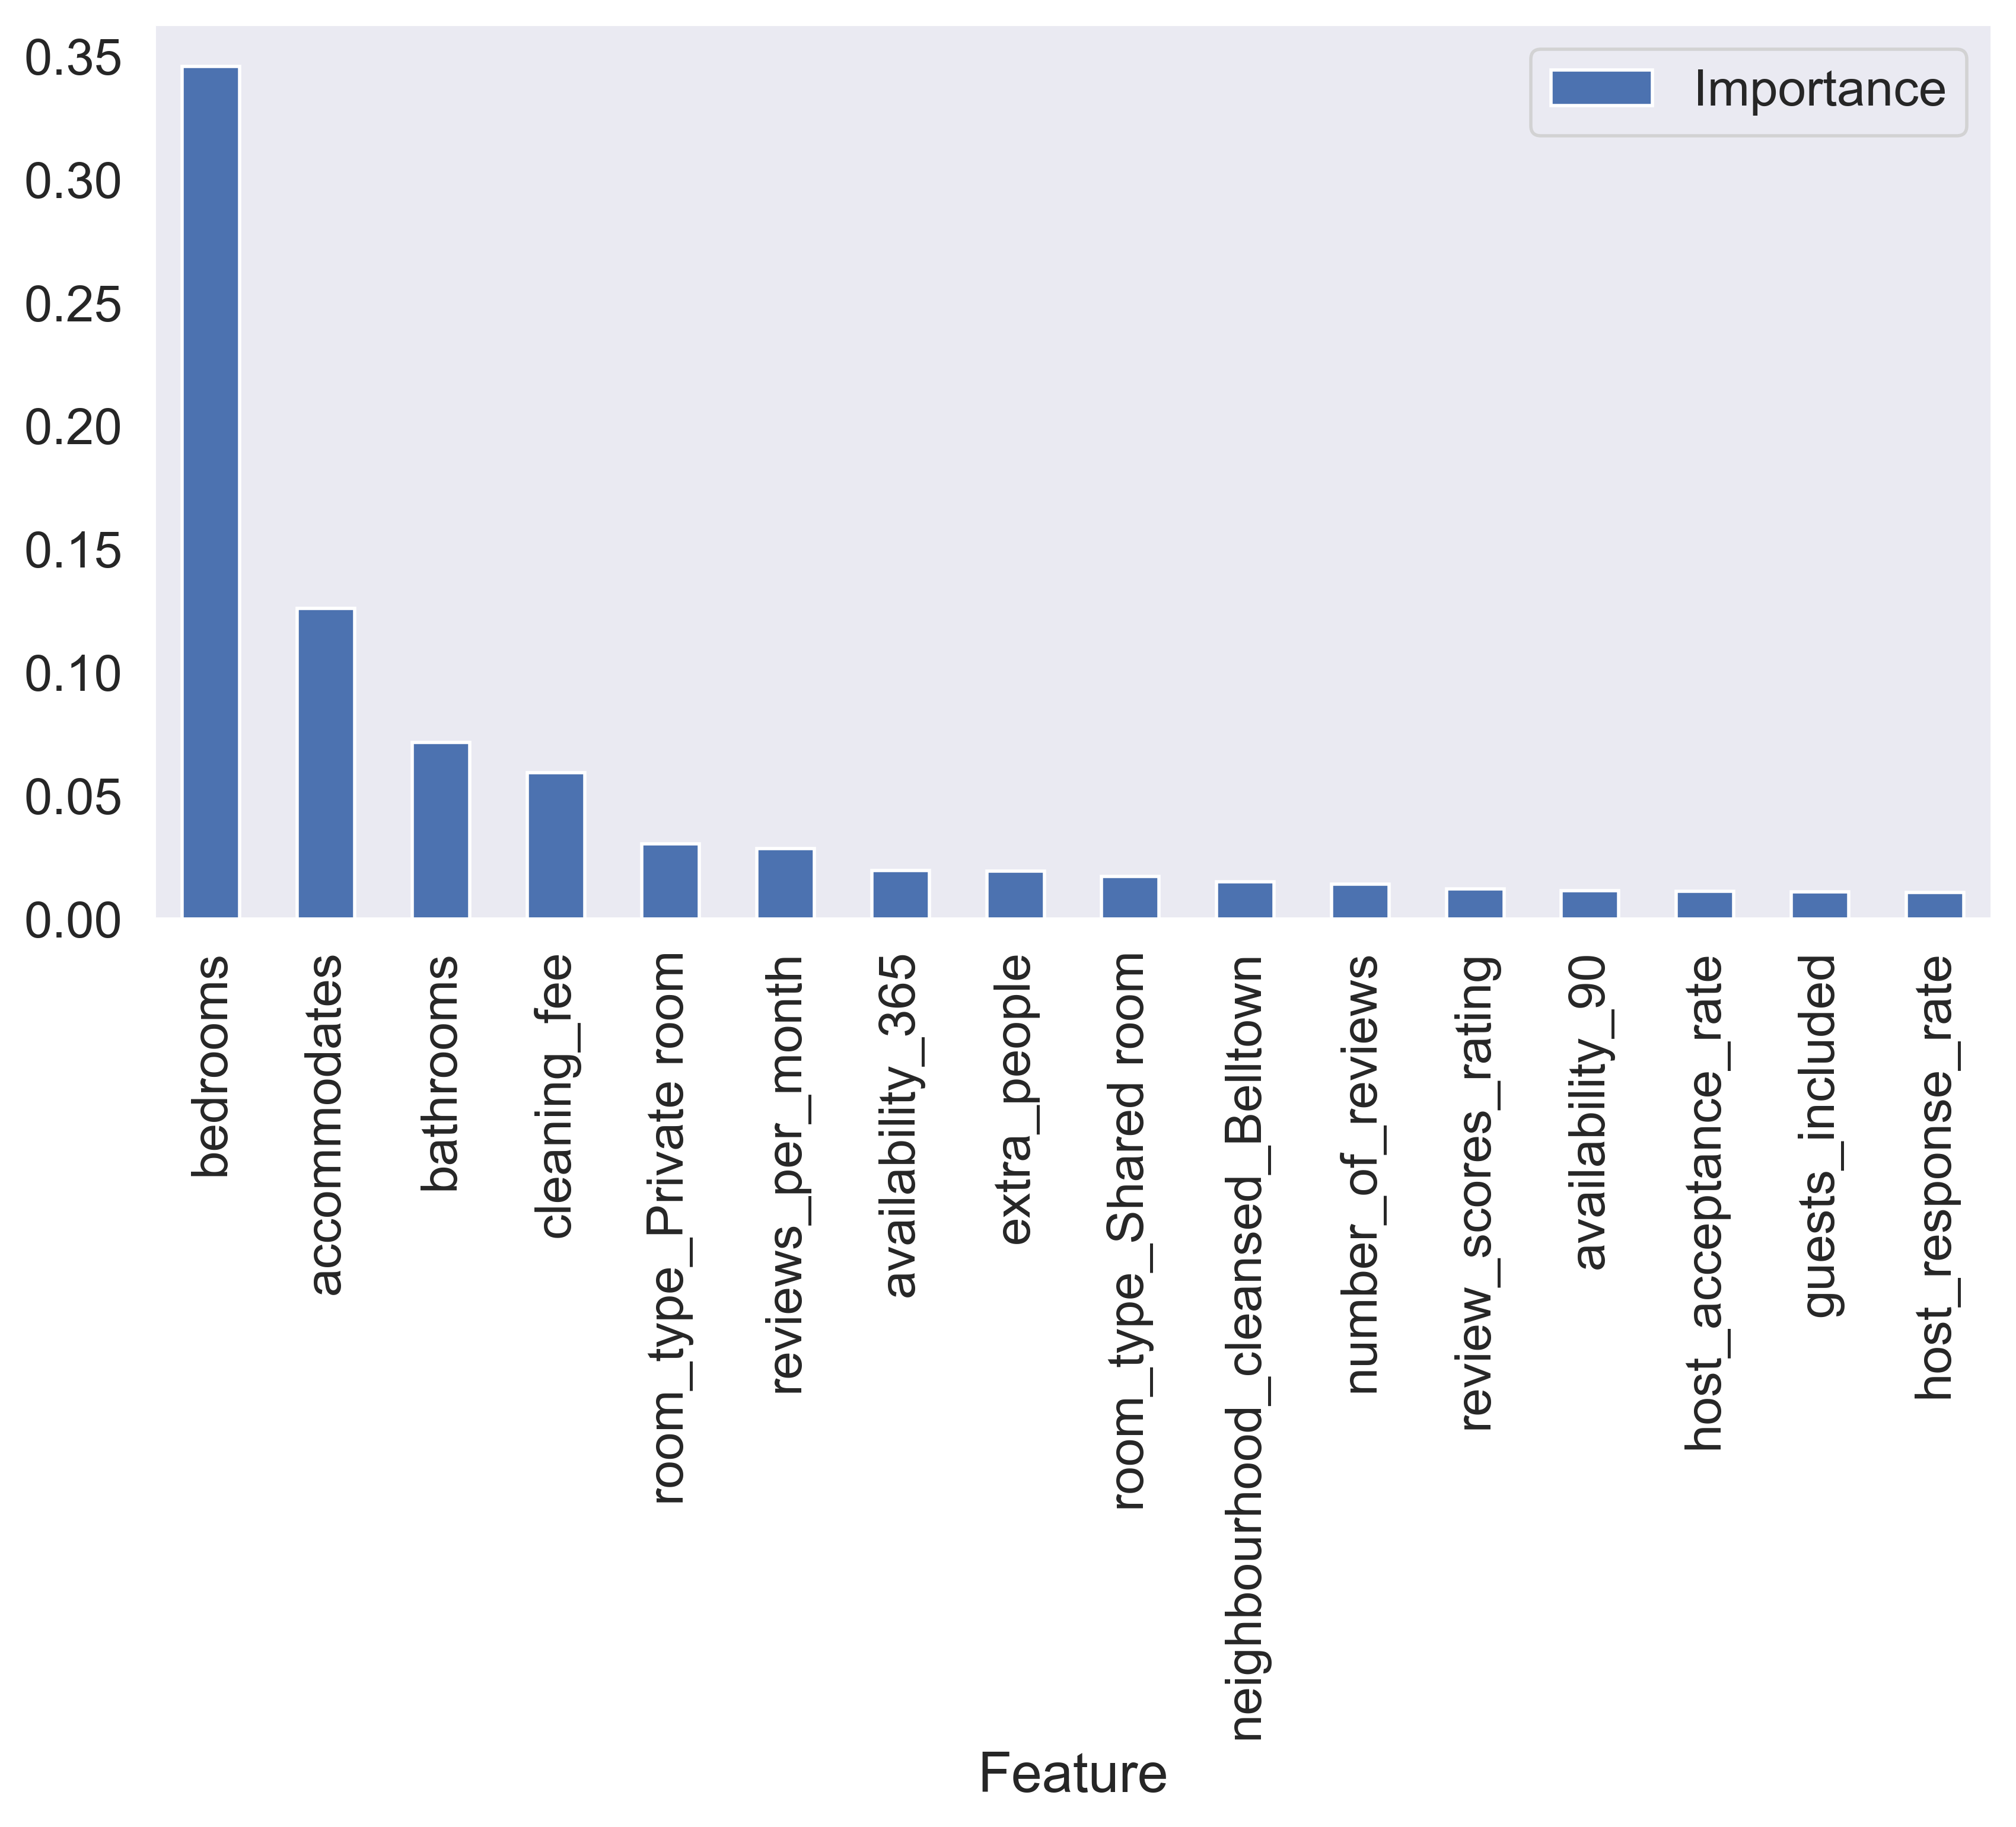

In [17]:
fig = plt.figure(figsize=(10,5), dpi=200)
ax = fig.gca()
df_result = pd.DataFrame({'Feature': x_price.columns, 'Importance': f_price.feature_importances_}).sort_values(by=['Importance'], ascending=False)
df_result = df_result[df_result['Importance'] > 0.01]
df_result.plot.bar( x='Feature', y='Importance', ax=ax)
ax.grid()

As we can see, the R2 score of the test data is less than 0.6, so we use grid search to see if we can optimize our model a little bit.

In [18]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [19]:
def gridsearch_randomforest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
    
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'max_features': [40, 80],
        'min_samples_leaf': [3, 6, 8],
        'min_samples_split': [6, 8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]
    }

    forest = RandomForestRegressor()
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, y_train)
    return grid_search
    

In [20]:
use_grid_search = True

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  9.5min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features=40, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
MSE train: 1200.080, test: 3026.642
R2 score train: 0.857, test: 0.611


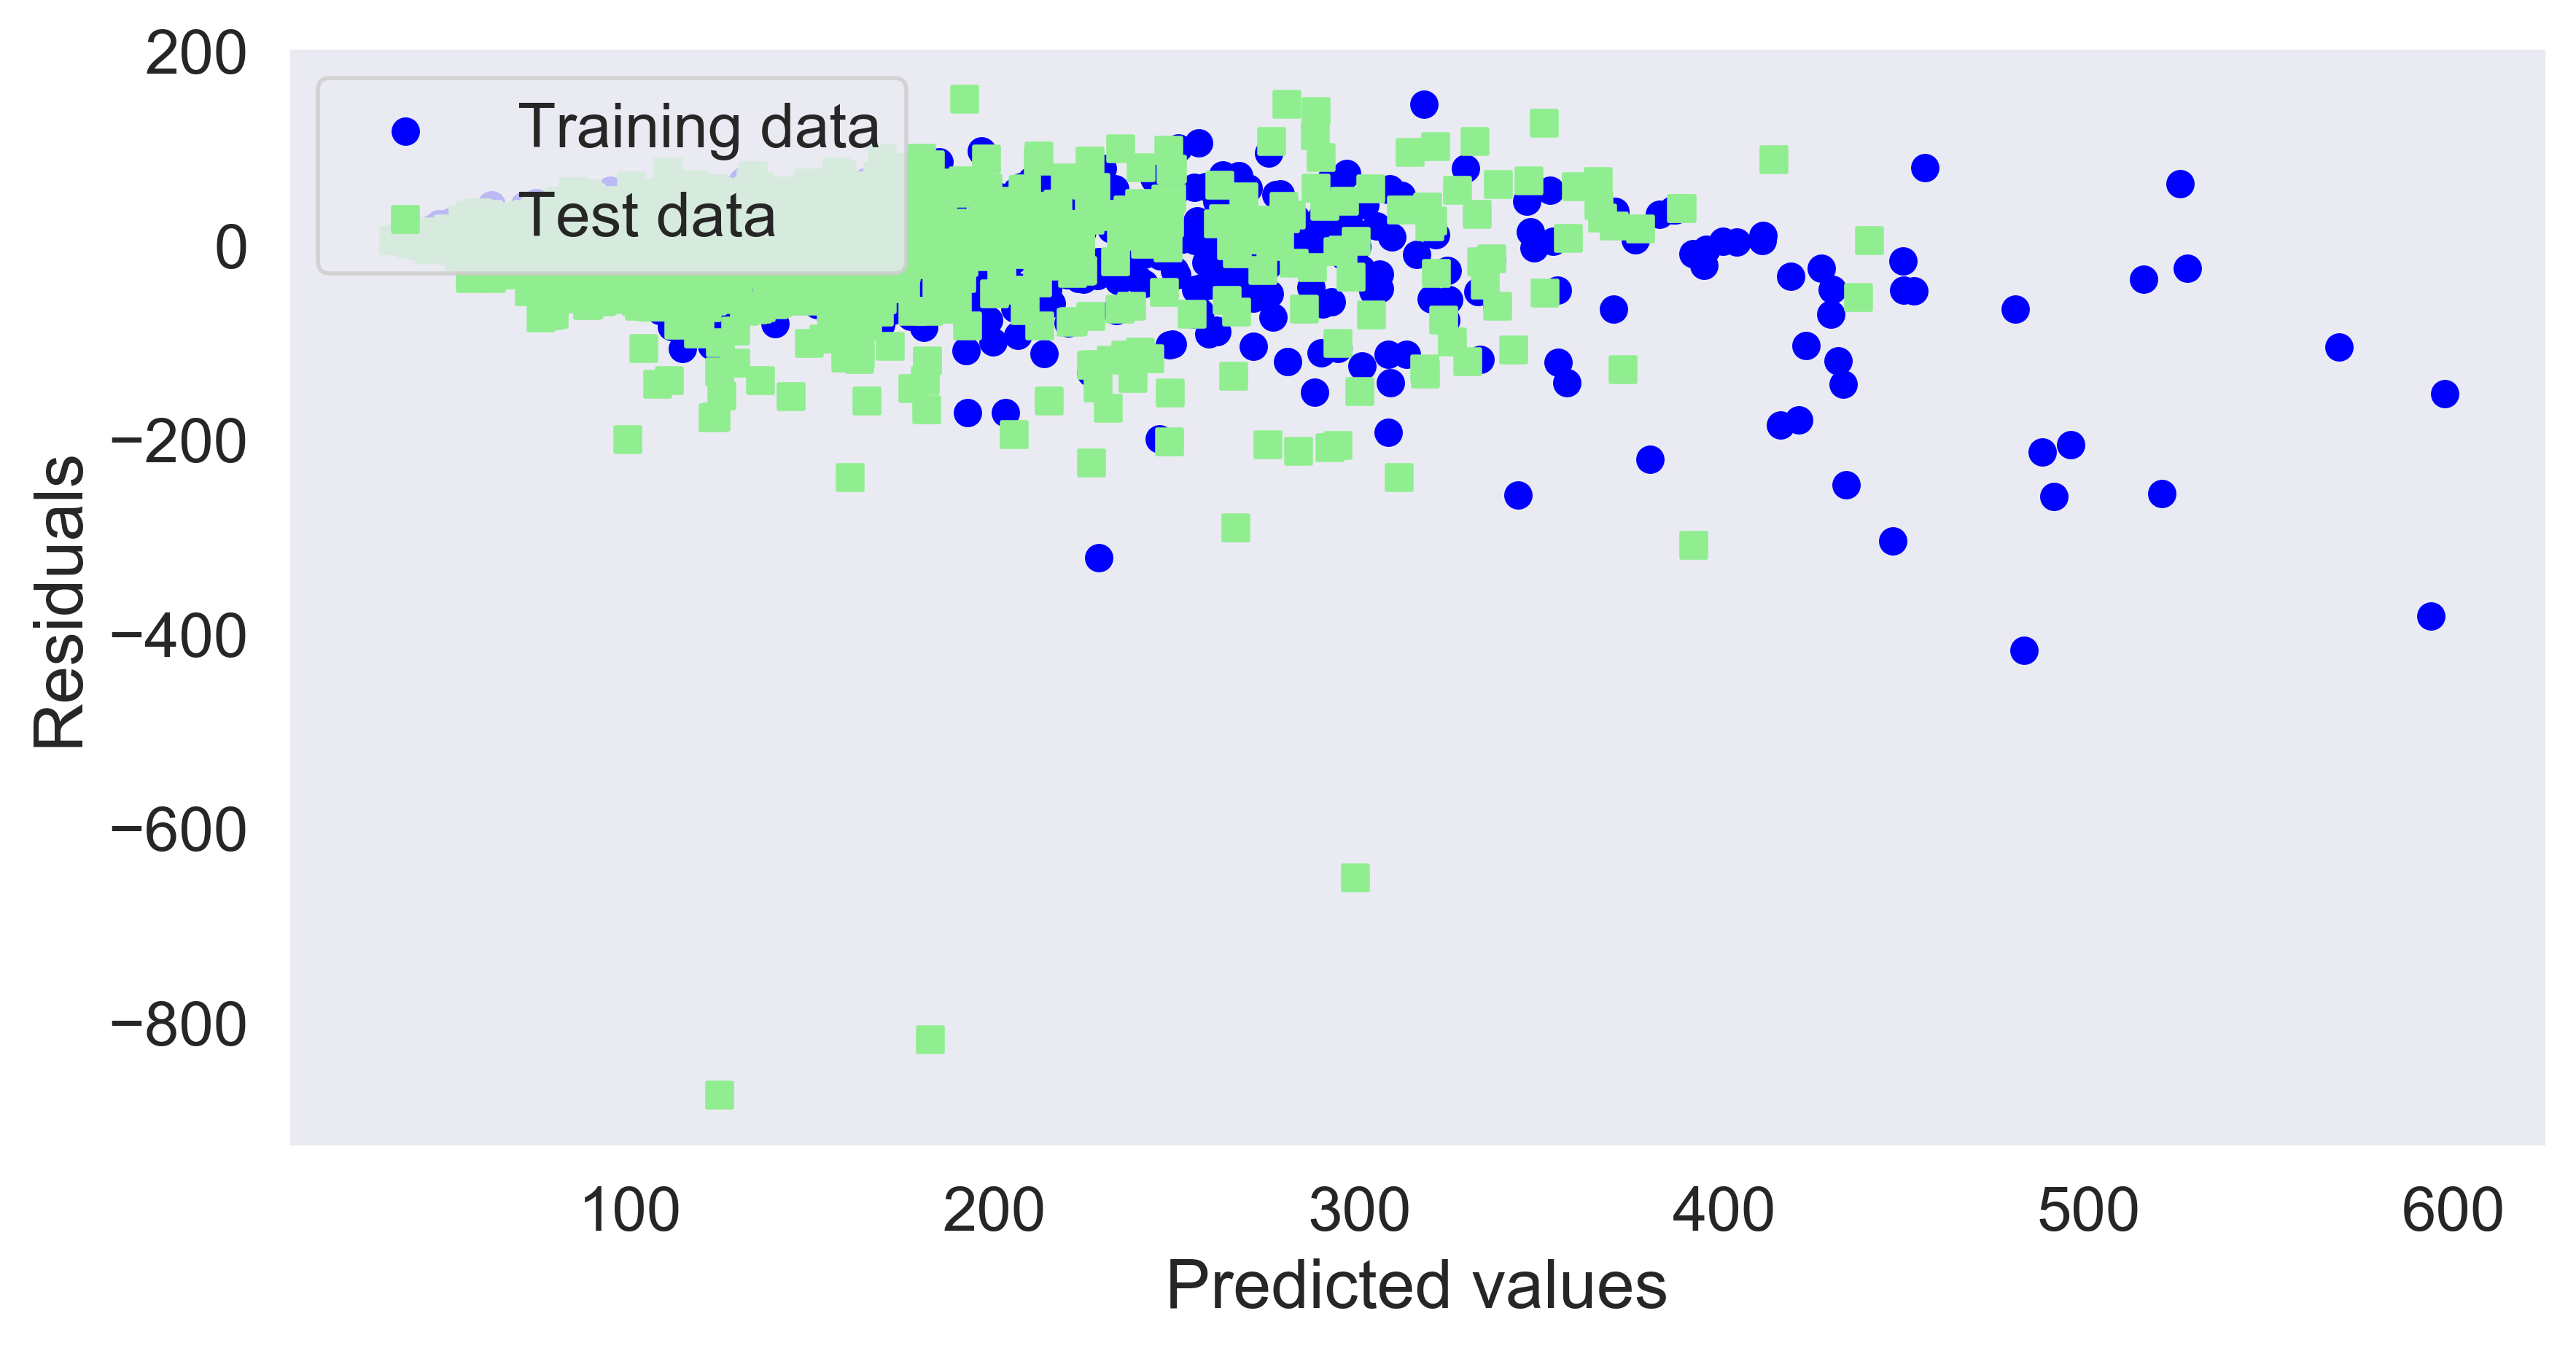

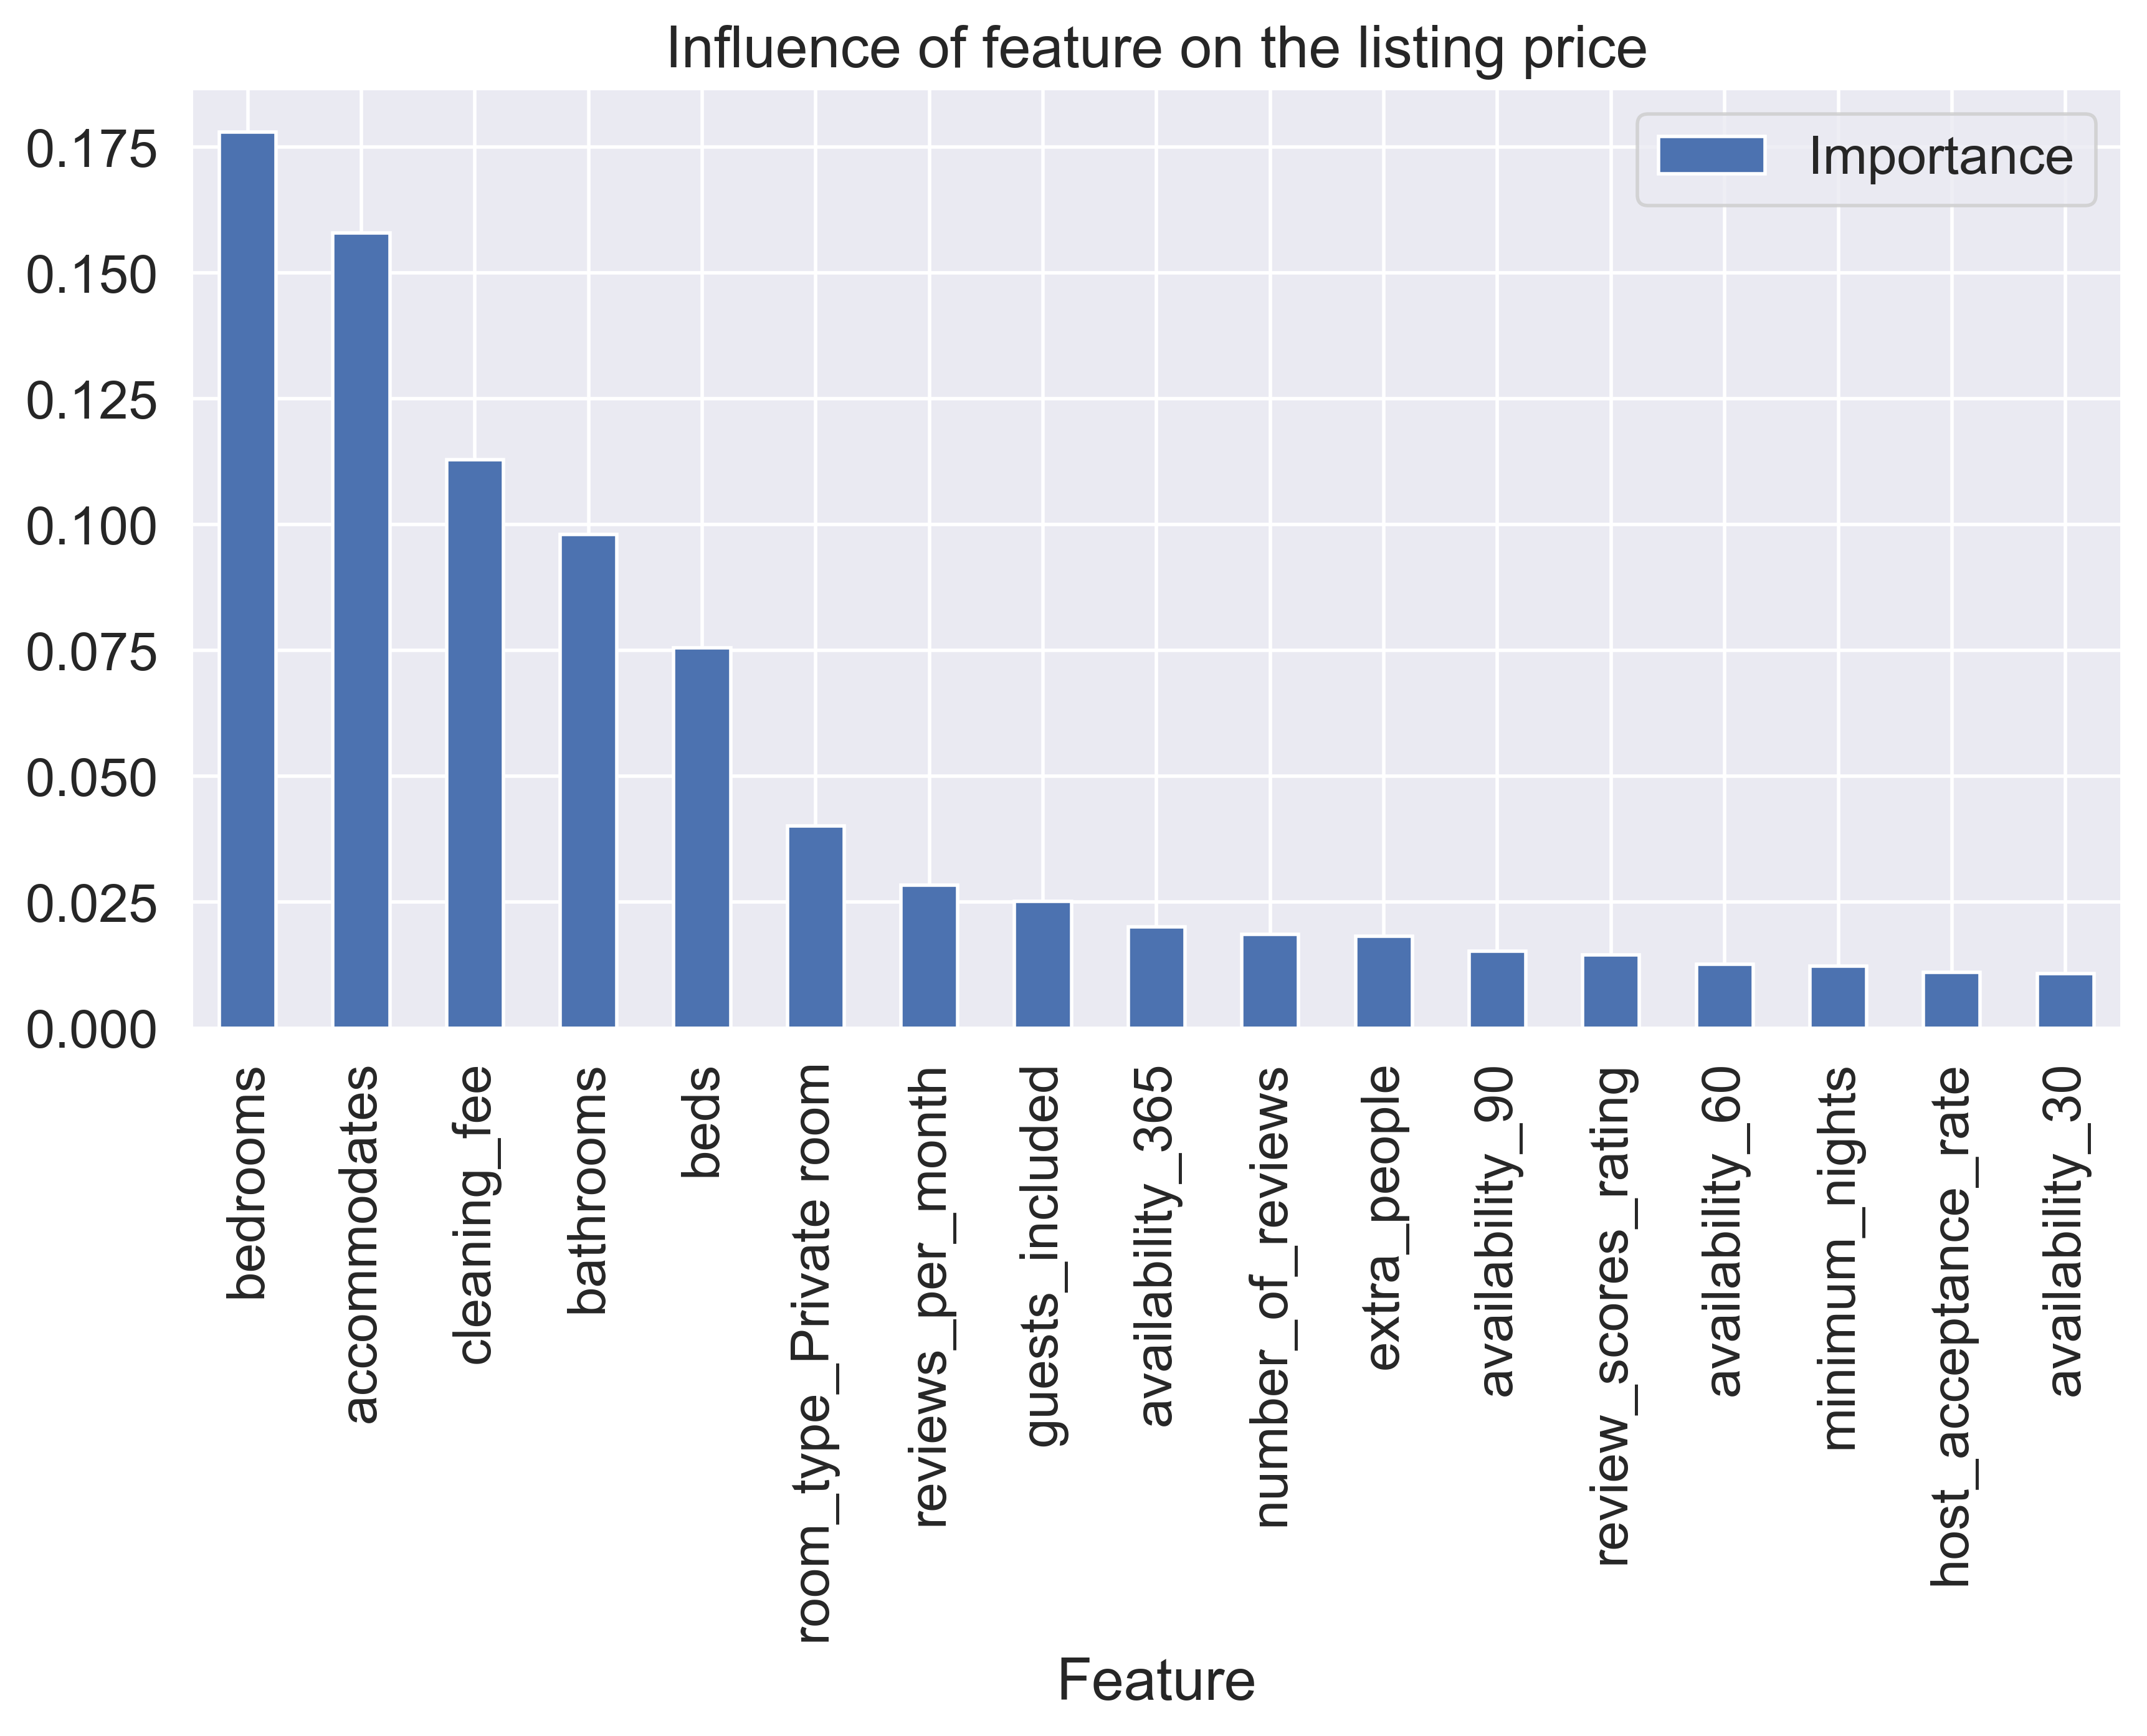

In [21]:
if use_grid_search:
    grid_search = gridsearch_randomforest(x_price, y_price)
    best_grid = grid_search.best_estimator_
    #grid_accuracy = evaluate(best_grid, X_test, y_test)
    print(best_grid)
    f_price_grid = fit_random_forest(x_price, y_price, best_grid)
    fig = plt.figure(figsize=(10,5), dpi=200)
    ax = fig.gca()
    df_result_grid = pd.DataFrame({'Feature': x_price.columns, 'Importance': f_price_grid.feature_importances_}).sort_values(by=['Importance'], ascending=False)
    df_result_grid = df_result_grid[df_result_grid['Importance'] > 0.01]
    df_result_grid.plot.bar( x='Feature', y='Importance', ax=ax, title='Influence of feature on the listing price', grid=20);


### Evaluation of results
From the feature importance barchart we can see that room type have a large influence on the price. People would pay more if they can get a private accomodation

#### Q3: What is the most expensive zipcode in seattle, as regarding the price of the AirBnb listings?

To answer this question, we will calculate the mean price of AirBnb listings grouped by the zipcode of the listing. To get an representative result, we only include those zipcodes with more than 5 listings.

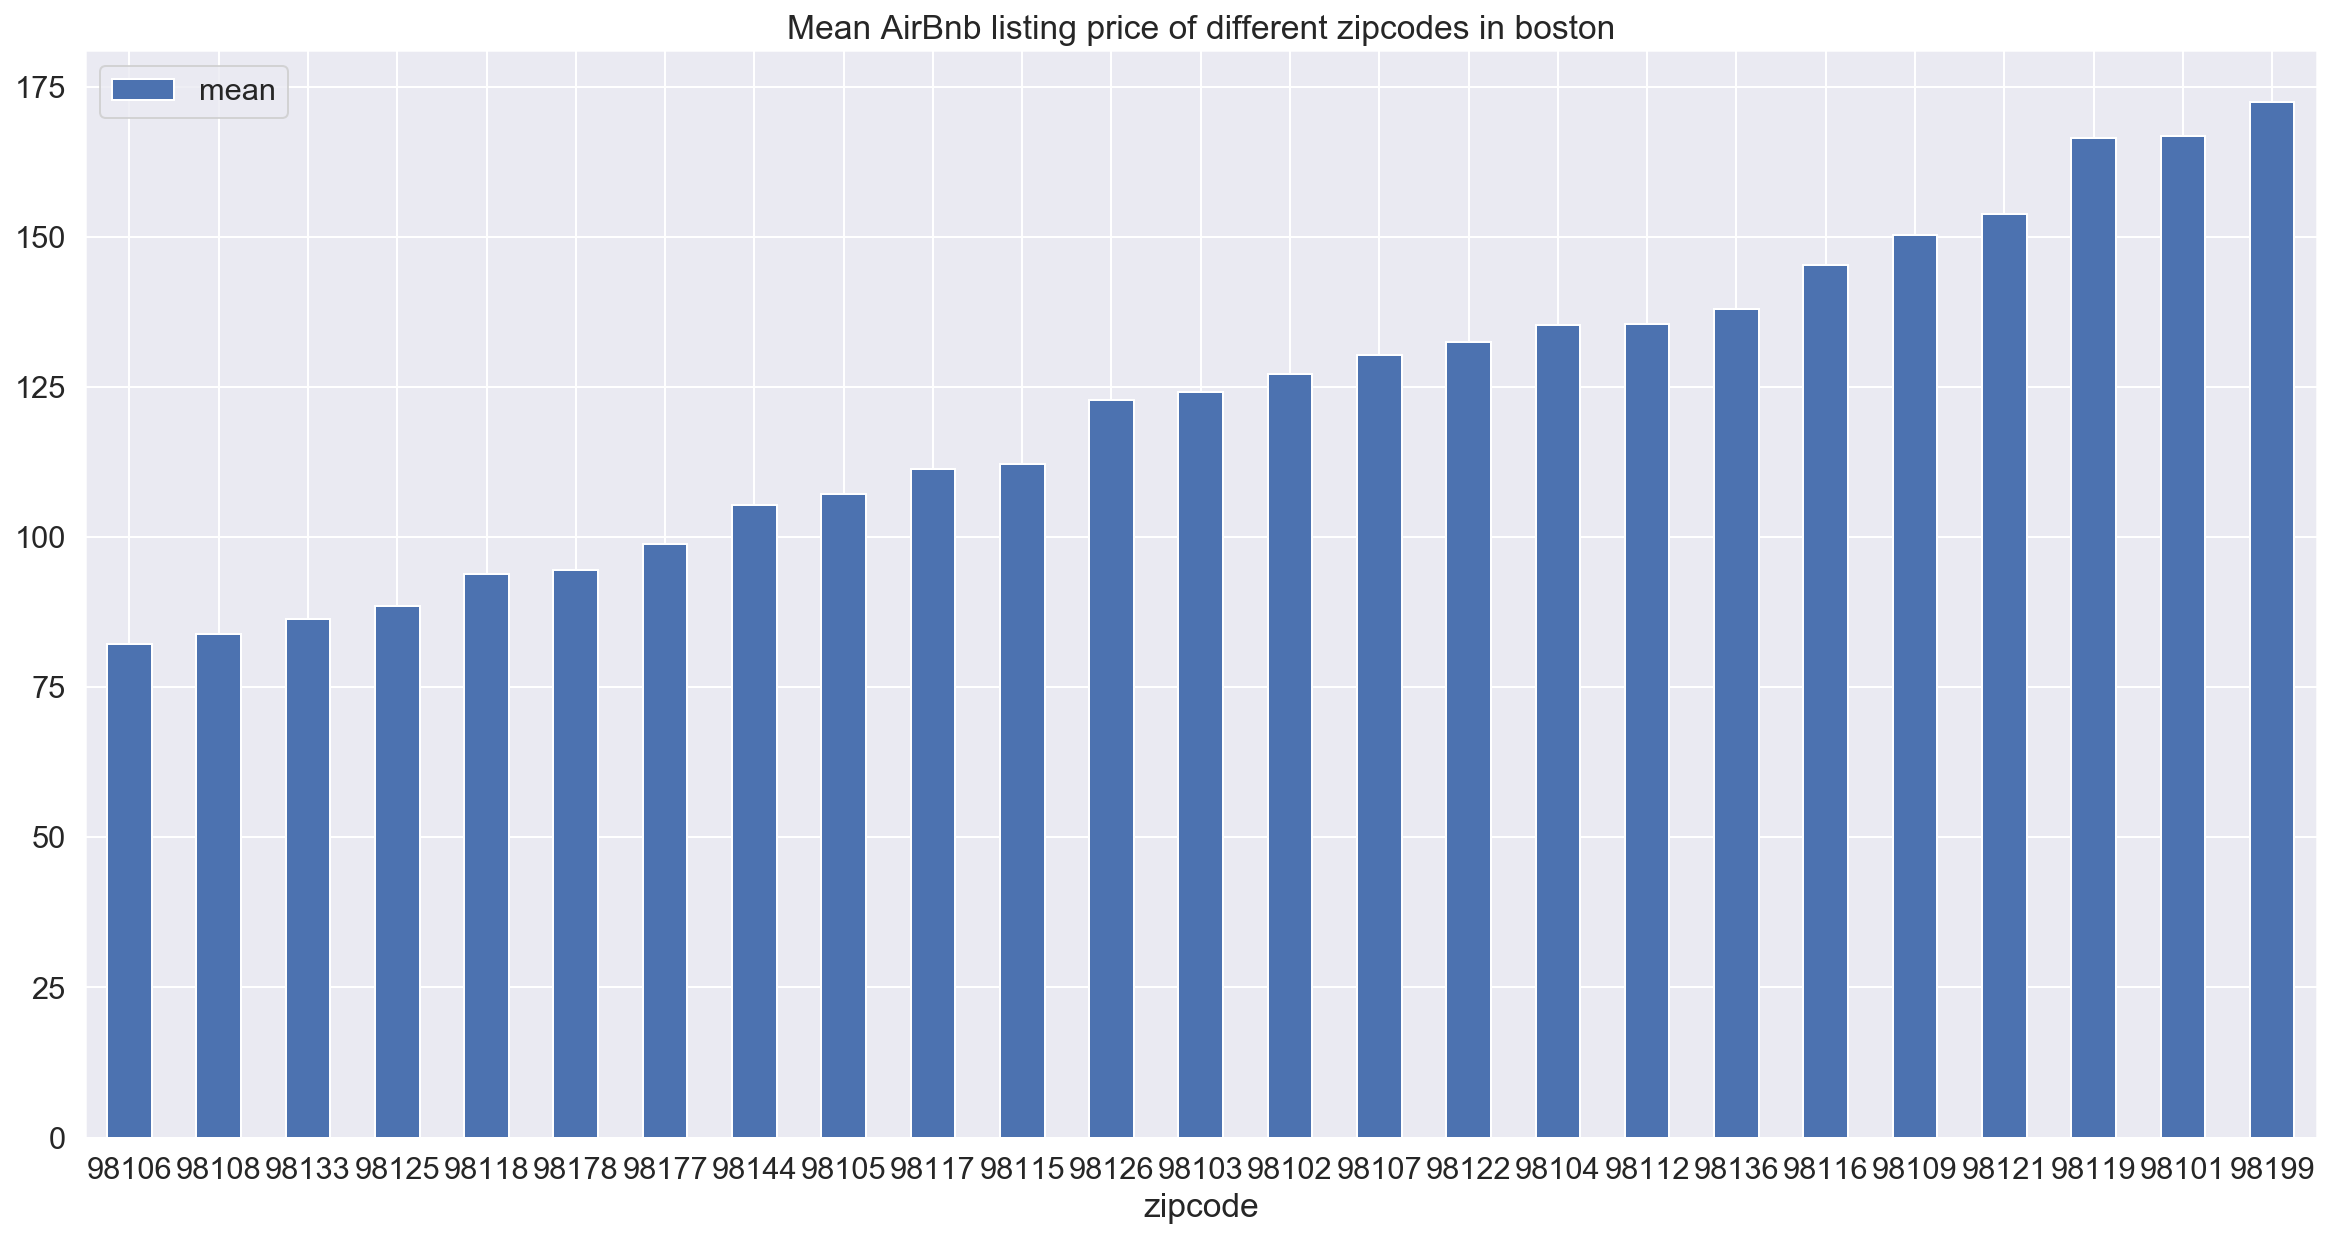

In [45]:
convert_special_symbol(df_listing, 'price')

df_zipcode = df_listing.dropna(subset=['price']).groupby(['zipcode'])['price'].agg(['mean', 'count','max']).reset_index()

df_zipcode = df_zipcode.loc[df_zipcode['count'] > 5]

df_zipcode = df_zipcode.sort_values('mean', ascending=True)


a = df_zipcode.plot.bar(x='zipcode', y='mean', rot=0, figsize=(20,10),grid=20, title= 'Mean AirBnb listing price of different zipcodes in boston');

In [46]:
# Top 5 expensive zipcodes
df_zipcode.sort_values(by='mean', ascending=False).head(5)

,zipcode,mean,count,max
26,98199,172.393939,66,950.0
0,98101,166.721393,201,999.0
14,98119,166.377622,143,975.0
15,98121,153.785714,196,899.0
8,98109,150.247525,202,775.0


In [47]:
# Button 5 expensive zipcodes
df_zipcode.sort_values(by='mean', ascending=True).head(5)

,zipcode,mean,count,max
5,98106,82.103448,58,250.0
7,98108,83.875000,56,375.0
19,98133,86.282609,46,200.0
17,98125,88.577465,71,250.0
13,98118,93.798701,154,375.0


In [48]:
cheap_zipcode = list(df_zipcode.sort_values(by='mean', ascending=True).head(5)['zipcode'])
exp_zipcode = list(df_zipcode.sort_values(by='mean', ascending=False).head(5)['zipcode'])

In [49]:
cheap_lat = []
cheap_lon = []
exp_lat = []
exp_lon = []

In [50]:
for zipcode in cheap_zipcode:
    lat = df_listing[df_listing['zipcode']  == zipcode]['latitude'].mean()
    lon = df_listing[df_listing['zipcode']  == zipcode]['longitude'].mean()
    cheap_lat.append(lat)
    cheap_lon.append(lon)
for zipcode in exp_zipcode:
    lat = df_listing[df_listing['zipcode']  == zipcode]['latitude'].mean()
    lon = df_listing[df_listing['zipcode']  == zipcode]['longitude'].mean()
    exp_lat.append(lat)
    exp_lon.append(lon)


In [51]:
base_map = folium.Map(location=[47.608013, -122.335167], zoom_start = 12)

# Make a data frame with dots to show on the map
cheap_zipcode_df = pd.DataFrame({
'lat':cheap_lat,
'lon':cheap_lon,
'name':cheap_zipcode
})

exp_zipcode_df = pd.DataFrame({
'lat':exp_lat,
'lon':exp_lon,
'name':exp_zipcode
})

# add marker one by one on the map
for i in range(0,len(cheap_zipcode_df)):
    folium.Marker([cheap_zipcode_df.iloc[i]['lat'], cheap_zipcode_df.iloc[i]['lon']], popup=cheap_zipcode_df.iloc[i]['name'],icon=folium.Icon(color='red', icon='info-sign')).add_to(base_map)
    
for i in range(0,len(exp_zipcode_df)):
    folium.Marker([exp_zipcode_df.iloc[i]['lat'], exp_zipcode_df.iloc[i]['lon']], popup=exp_zipcode_df.iloc[i]['name']).add_to(base_map)
 
 
# Save it as html
base_map.save('312_markers_on_folium_map1.html')

In [52]:
base_map

#### Evaluation
From the barchart above we can see that the mean price of the listings vary largely between different zipcode. The mean price of the top 5 expensive zipcodes range between 230 dollars/night to 313 dollars/night, while the mean price of the cheapest 5 zipcodes are between 80 dollars/night to 95 dollars per night.

From the marker in the openstreet map above, we see that the expensive zipcodes (blue marking) are located downtown, and the cheaper zipcodes (red marking) are outside of the city. 